# Ranking Prediction of Higher Education Institutes using Financial and Expenditure Data 

## Supervised Machine Learning

### by Mohamad Zeini Jahromi
Sep 18th, 2017

## Project Overview


The total number of awards, certificates, and degrees completed each year in post-secondary education institutions have been widely used to evaluate their performances and are an indication of relative success and ranking of these institutions throughout the nation. Many studies have investigated the effects of different parameters (such as financial aid, institutes funds, revenue, expenditures and etc.) on the institutes completion rates. The results of these studies could help institutions to decide how to allocate funds to their segments more effectively and create a well-balanced money flow within their systems. On the other hand, the costs of higher education in the United Sates are high and it’s being considered as an investment and consequently having a knowledge of success rate and ranking of a specific institution would help both students and their families in making the right decision.

This project focuses on studying the relationship between institutions financial aid and expenditure and their respective completion rates (the total number of award, certificate, and degree completed). Furthermore, a predictive model will be developed in order to predict the completion rates using the financial aid and expenditure data of institutions.
This study is inspired by Udacity's capstone project guidelines and uses the IPEDS dataset ([Integrated Postsecondary Education Data System Delta Cost Project Database](https://nces.ed.gov/ipeds/deltacostproject/)), which is based on surveys on finance, enrollment, staffing, completions, and student aid of post-secondary education institutions within the US. 

## Problem Statement
As stated above, the completion rates (the total number of award, certificate, and degree completed) is a measure of success and ranking of institutions. This study is seeking to find out whether the completion rates could be predicted based on financial aid and expenditure data from post-secondary education institutions and in the following, the results will be analyzed to see which parameters are more significant in terms of predicting the target label (completion rates).  

## Solution Strategy
Different algorithms (**K-Nearest Neighbor Regressors, Support Vector Regressors, Random Forest Regressors** and etc.) will be used to create predictive models. Eventually, these models will be able to predict a specific institution completion rate based on its expenditure or financial aid features. 

The data cleaning process will be performed on the dataset to eliminate outliers or missing values and then cross-validation is used to split the dataset into a training and a testing datasets. 

The Principal Component Analysis will be implemented to find the dimensions that explain the most of the variance. The top components become predicting features for creating the model. Before the PCA procedure, the standardizing and transforming procedures will be performed on the dataset. The models will be tuned using Grid Search function using sets of hyperparameters. 

## Evaluation Metrics
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) (R<sup>2</sup>) to quantify our model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. R<sup>2</sup>, however, inflates when adding more predictors (variables) to the metric. The variance caused by predicted value hence increase even without model improvement. Adjusted R<sup>2</sup> score is developed to counter the inflation and adding a penalty for additional variables entering the metric. Adjusted R<sup>2</sup> is always smaller or equal to R<sup>2</sup> score. A model can be given a negative R<sup>2</sup> as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.

For the `performance_metric` function in the code cell below, we implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.


In [1]:
# Import 'r2_score'
from sklearn.metrics import r2_score 

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    # Return the score
    return score

## Data Exploration
The dataset used in this project are from IPDES database ([Integrated Postsecondary Education Data System Delta Cost Project Database](https://nces.ed.gov/ipeds/deltacostproject/)), which is based on surveys on finance, enrollment, staffing, completions, and student aid of post-secondary education institutions in the US. It consists of many features including financial aid, revenue, and expenditure of institutes across the US. The datasets for academic years of 1987-1999 and 2000-2012 have the total number 215613 entries and 974 features. All expenditure categories (20 features) are used as the **Expenditure Features** and in the same way, the financial aid categories (5 features) are used as the **Financial aid Features**. Also, the categories that contain total completions value are going through further preprocessing to create the **Completion Rates Label**.

The selected features are numerical, and since the dataset contains a significant amount of null value (missing data or unreported data), multiple data cleaning scenarios will be performed which results in eliminating some features and data points. 

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

#load IPEDS datasets
data_00_12=pd.read_csv("delta_public_00_12.csv")
data_87_99=pd.read_csv("delta_public_87_99.csv")

#concatenate datasets
data=pd.concat([data_00_12,data_87_99])

# Success
print "IPEDS datasets has {} data points with {} variables each.".format(*data.shape)

C:\Users\Mo\Anaconda3\envs\DAND\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


IPEDS datasets has 215613 data points with 974 variables each.


In [3]:
display(data.describe())

,groupid,academicyear,unitid_linchpin,unitid,isgrouped,ansi_code,sector,sector_revised,iclevel,control,...,Iptall1,Iptall2,Iptall3,Iptall4,Iptall5,Iptall6,Iptall7,Iptall8,Ifaculty_instr_headcount,Isalarytotal
count,215613.000000,215613.000000,215613.000000,215613.000000,215613.000000,215613.00000,215613.00000,215613.000000,215613.000000,215613.000000,...,215613.000000,215613.000000,215613.000000,215613.000000,215613.000000,215613.000000,215613.000000,215613.000000,215613.000000,215613.000000
mean,-206710.434320,1997.929411,222154.658193,222154.658193,0.074597,28.13802,5.65753,5.664890,2.041561,2.243116,...,-1.453512,-1.599328,-1.575053,-1.506635,-1.555509,-1.487647,-1.609745,-1.532125,-0.749055,-0.748104
std,113440.202448,7.448015,99592.246073,99592.246073,0.262740,16.53170,5.33754,5.333179,0.927678,0.844804,...,0.891252,0.800505,0.818118,0.862163,0.831512,0.873043,0.792599,0.846668,0.605949,0.608012
min,-475291.000000,1987.000000,1025.000000,1025.000000,0.000000,1.00000,0.00000,0.000000,-3.000000,-3.000000,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-236072.000000,1991.000000,151360.000000,151360.000000,0.000000,13.00000,2.00000,2.000000,1.000000,2.000000,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.000000,-1.000000
50%,-189918.000000,1997.000000,196334.000000,196334.000000,0.000000,27.00000,6.00000,6.000000,2.000000,2.000000,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.000000,-1.000000
75%,-140386.000000,2004.000000,238661.000000,238661.000000,0.000000,41.00000,9.00000,9.000000,3.000000,3.000000,...,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,0.000000
max,3041.000000,2012.000000,475291.000000,475291.000000,1.000000,78.00000,99.00000,99.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000


## Feature Observation
The following, shows the data subset features that are being selected to be used in this project. The table has 27 rows including 20 Expenditure features, 5 Financial aid features, the **totalcompletions** target label and the **has_completion** tag. A brief explanation of each feature is provided in the next column.

**Eligible data points:**
* **has_completion**: Indicator of whether totalcompletions is reported. (0=not reported; 1=reported)

**Label:**
* **totalcompletions**: the total number of degree, award, certificate granted of the current year. 

**Features (Expenditure):**
* **instruction01**: instructional expenses for the institution and excludes administration, operations and maintenance.
* **research01**: expense used to produce research outcomes excluding operation and maintenance, interest amounts attributed to the research functions.
* **pubserv01**: expense category that provides noninstructional services beneficial to individuals and groups external to the institution such as conferences. Operations and maintenance, interest amounts attributed to the research function are excluded.
* **acadsupp01**: expenses to support instruction, research, and public service. This category includes retention, preservation, and display of education materials. Operations and maintenance and interest amounts attributed to the academic support function are excluded.
* **studserv01**: expenses associate with admissions, registrar activities, and activities that contribute to students' emotional and physical well-being and their intellectual, cultural, and social development outside the formal instructional program. Operations and maintenance (and interest in the 2009 aligned form) amounts attributed to the student services function are excluded.
* **instsupp01**: expense for day-to-day operational support of the institution such as space management, employee personnel, and records. Operations and maintenance and interest amounts attributed to the institutional support are excluded.
* **acadinststud01**: academic and institutional support and student service total of current year
* **opermain01**: expenses for operations providing service and maintenance related to campus grounds and facilities. Institutions may optionally distribute depreciation expense to this function.
* **depreciation01**: total depreciation of current year
* **grants01**: the sum of all operating expenses associated with scholarships and fellowships including payment in support of the cost of education or third parties for off-campus housing. Operations and maintenance and interest amounts are excluded.
* **auxiliary01**: expense of all operating associated with essentially self-supporting operations of the institution such as student health services. The amount of interest is excluded.
* **hospital01**: operating expenses related to a hospital run by the postsecondary institute.
* **independ01**: expenses associated with operations that are independent of or unrelated to the primary missions of the institution. The amount of interest attributed to the independent operations function is excluded as well as for the expenses of operations owned and managed as investments of the institution's endowment funds.

* **totaloper01**: total expenses is the sum of all operating expenses that result from providing goods and services. 

* **otheroper01**: All expense other than categories above which discontinued after the Academy year 2010.
* **othernon01**: All other non-operating expense of current year
* **other01**: All other expense

* **eandg01**: Total education and general expenditures includes all core operating expenditures, including sponsored research, but excluding auxiliary enterprises. 


* **rschpub01**: expense for research and public service of current year

* **acadinststud01**: Expenditures for academic and institutional support and student services.

**Features (Financial aid):**

* **appliedaid01**: Discounts and allowances applied to tuition and fees are reductions to the amount charged for tuition and fees by the application of scholarships and fellowships. 

* **grant07**: The sum of Pell, Federal, State, Local, and Institutional Grants (funded and unfunded). 

* **tuition_discount**: That part of a scholarship or fellowship that is used to pay institutional charges such as tuition and fees or room and board charges.

* **any_aid_num**: Number of full-time, first-time degree/certificate-seeking undergraduate students who received any financial aid including grants, loans, assistantships, scholarships, fellowships, tuition waivers, tuition discounts, veteran's benefits, employer aid (tuition reimbursement) and other monies (other than from relatives/friends) provided to students to meet expenses. 

* **loan_num**: Number of full-time, first-time degree/certificate-seeking undergraduate students who received student loans. 

In [4]:
label = ['totalcompletions']

expenditure = ['instruction01','research01','pubserv01','acadsupp01','studserv01','instsupp01',
               'opermain01','depreciation01','grants01','auxiliary01','hospital01','independ01',
               'totaloper01','otheroper01','othernon01','other01','eandg01','rschpub01',
               'acadinststud01']
           
financial_aid = ['appliedaid01', 'grant07','tuition_discount','any_aid_num','loan_num']

eligibility = ['has_completions'] 

data = data[eligibility + label + expenditure + financial_aid]

In [5]:
print 'Number of institutions eligible with completion data:',(data['has_completions'] == 1).sum()
print 'Number of data point with Negative value:', (data < 1).sum().sum()
print 'Number of data point with Null value:', data.isnull().sum().sum(), '\n'
print 'Number of data point with Null value for each feature:\n', data.isnull().sum()

Number of institutions eligible with completion data: 142220
Number of data point with Negative value: 166367
Number of data point with Null value: 3766731 

Number of data point with Null value for each feature:
has_completions          0
totalcompletions     72733
instruction01        99565
research01          189057
pubserv01           174161
acadsupp01          133299
studserv01          108102
instsupp01          130750
opermain01          136464
depreciation01      174980
grants01            152047
auxiliary01         141043
hospital01          213328
independ01          212062
totaloper01         163432
otheroper01         210332
othernon01          210227
other01             180551
eandg01              98740
rschpub01           166136
acadinststud01      103254
appliedaid01        165228
grant07             102923
tuition_discount    134480
any_aid_num         146899
loan_num            146938
dtype: int64


## Data Cleaning
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured (preprocessing). Some initial observations are as follows:
* The **has_completion** feature shows that only 142220 out of total number of 215613 entries are eligible institutions with the completion rates data.
* 166367 of data points have negative values (which does not make sense in terms of dollars)
* 3766731 of data points have Null value or missing.

In the first step, all the entries without the completion rates data are removed. Next, the features that include more than 80% of Null or missing values are removed. Then, the remaining data points that have Null or missing values, or negative values are eliminated. 
After initial data cleaning procedure, the dataset is left with 4609 entries and 21 columns (including 19 features, the **totalcompletions** target label, and the **has_completion** tag). This preprocessing significantly improves the accuracy of outcomes and the predictive power of learning algorithms.


In [6]:
#Excluding data point with out report of totalcompletion
data = data[data['has_completions'] == 1]
print data.shape, ' New data structure after removing uneligible values without completion data'

# Remove columns with more than 80% Null data
for k in data.keys():
    if (data[k].isnull().sum() / float(len(data)))> 0.8:
        data.drop(k, axis=1, inplace=True)
print data.shape, ' New data structure after removing columns with more than 80% Null'

# Drop the data points with Null data
data.dropna(inplace=True)
print data.shape, ' New data structure after removing Null values'

# Drop the negative data points 
data = (data[data >= 0]).dropna()
print data.shape, ' New data structure after removing Negative values'


(142220, 26)  New data structure after removing uneligible values without completion data
(142220, 21)  New data structure after removing columns with more than 80% Null
(4613, 21)  New data structure after removing Null values
(4609, 21)  New data structure after removing Negative values


## Calculate Statistics
The following Table summarizes the descriptive statistics of Expenditure/Financial datasets are calculated. *numpy* library has already been imported and used to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model. The minimum, maximum, mean, median, and standard deviation of few features are presented in the table.

In [7]:
from pandas.tools.plotting import table
#Reset dataframe index 
data = data.reset_index(drop=True)

display(data.describe())

,has_completions,totalcompletions,instruction01,pubserv01,acadsupp01,studserv01,instsupp01,opermain01,depreciation01,grants01,...,totaloper01,other01,eandg01,rschpub01,acadinststud01,appliedaid01,grant07,tuition_discount,any_aid_num,loan_num
count,4609.0,4609.000000,4.609000e+03,4.609000e+03,4.609000e+03,4.609000e+03,4.609000e+03,4.609000e+03,4.609000e+03,4.609000e+03,...,4.609000e+03,4.609000e+03,4.609000e+03,4.609000e+03,4.609000e+03,4.609000e+03,4.609000e+03,4.609000e+03,4609.000000,4609.000000
mean,1.0,2153.595916,6.676407e+07,1.189261e+07,1.607211e+07,1.026521e+07,1.711139e+07,1.482547e+07,1.347344e+07,9.062319e+06,...,2.271026e+08,6.238758e+06,1.737777e+08,3.969372e+07,4.344387e+07,1.155133e+07,2.202762e+07,1.273067e-01,1098.761987,572.962031
std,0.0,3137.575501,1.392367e+08,3.591096e+07,3.221997e+07,1.592156e+07,3.150710e+07,3.062092e+07,4.290994e+07,1.811422e+07,...,5.170134e+08,4.971934e+07,3.662730e+08,1.189565e+08,7.514446e+07,2.268108e+07,4.018531e+07,1.166008e-01,1508.399685,751.636729
min,1.0,14.000000,5.377000e+03,8.300000e+01,1.028000e+03,1.624000e+03,2.144000e+03,1.325000e+03,5.170000e+02,1.510000e+03,...,1.704800e+04,1.000000e+00,1.565800e+04,8.300000e+01,4.796000e+03,7.800000e+01,3.064000e+03,1.403216e-08,6.000000,0.000000
25%,1.0,529.000000,1.170076e+07,3.964930e+05,2.224223e+06,2.607702e+06,3.736067e+06,2.803707e+06,1.323696e+06,1.697201e+06,...,3.243420e+07,9.183657e+04,2.775764e+07,4.911620e+05,9.047994e+06,1.910207e+06,4.705372e+06,4.620488e-02,301.000000,81.000000
50%,1.0,1100.000000,2.469654e+07,1.610471e+06,5.224699e+06,5.138184e+06,7.529455e+06,6.113570e+06,3.427276e+06,3.824000e+06,...,7.021970e+07,5.576130e+05,5.765063e+07,2.345423e+06,1.818131e+07,4.666428e+06,9.682566e+06,9.833756e-02,638.000000,300.000000
75%,1.0,2555.000000,6.110665e+07,5.921572e+06,1.455239e+07,1.195228e+07,1.802700e+07,1.429288e+07,9.279948e+06,9.584321e+06,...,1.685595e+08,2.754737e+06,1.427253e+08,1.292015e+07,4.497659e+07,1.153679e+07,2.239654e+07,1.788751e-01,1345.000000,815.000000
max,1.0,43561.000000,2.517901e+09,4.051710e+08,4.049135e+08,2.681069e+08,4.765594e+08,6.524091e+08,1.776640e+09,2.914183e+08,...,7.928519e+09,2.408395e+09,6.165973e+09,1.636438e+09,1.067806e+09,3.515930e+08,6.014743e+08,1.774030e+00,23964.000000,9632.000000


In [8]:
# target or label
y = data['totalcompletions']
# features
x = data.drop(['totalcompletions','has_completions'], axis=1)
display(x.head())
print x.shape, ' Features dataset structure' 
print y.shape, ' Label dataset structure' 

,instruction01,pubserv01,acadsupp01,studserv01,instsupp01,opermain01,depreciation01,grants01,auxiliary01,totaloper01,other01,eandg01,rschpub01,acadinststud01,appliedaid01,grant07,tuition_discount,any_aid_num,loan_num
0,21271000.0,6247000.0,10678000.0,7620000.0,25400000.0,11559000.0,17830000.0,5524000.0,7262000.0,145062000.0,19198000.0,101190000.0,19138000.0,43698000.0,10719000.0,20669000.0,0.694820,768.0,410.0
1,3381000.0,90000.0,586000.0,759000.0,1438000.0,287000.0,233000.0,444000.0,656000.0,7874000.0,853000.0,6985000.0,90000.0,2783000.0,389000.0,849000.0,0.078713,69.0,16.0
2,7759162.0,533007.0,216781.0,877732.0,2433057.0,1609337.0,479162.0,2373606.0,1404632.0,17686476.0,1293557.0,15802682.0,533007.0,3527570.0,1128995.0,3587855.0,0.040513,243.0,102.0
3,8866137.0,499516.0,290757.0,1406955.0,2573069.0,948427.0,622235.0,2436324.0,1499302.0,19142722.0,763423.0,17021184.0,499516.0,4270781.0,1152778.0,3692224.0,0.049800,237.0,110.0
4,9457812.0,469808.0,239381.0,1388520.0,2528163.0,1027562.0,1026184.0,3038049.0,1372520.0,20548000.0,877750.0,18149296.0,469808.0,4156064.0,1240168.0,4360728.0,0.046230,246.0,113.0


(4609, 19)  Features dataset structure
(4609L,)  Label dataset structure


## Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, Tukey's Method is used for identifying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal. Once this implementation has performed, 67 entries are detected as outliers and removed from the dataset.

In [9]:
outliers  = []
# For each feature find the data points with extreme high or low values
for feature in x.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(x[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(x[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
#    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier = (x[~((x[feature] >= Q1 - step) & (x[feature] <= Q3 + step))])
#    display(outlier)

# OPTIONAL: Select the indices for data points you wish to remove
    for i in outlier.index: 
        outliers.append(i)
        
# Remove the outliers, if any were specified
good_data = x.drop(x.index[outliers]).reset_index(drop = True)
print 'Number of outliers:', len(outlier)

Number of outliers: 251


## Exploratory Visualization
To get a better understanding of the dataset, both heatmap and scatter matrix of all the features are constructed and illustrated in next figures. 

There are high correlations between most of the variables. For instance, **instruction01** feature correlates with most of the variables specially with **eandg01, totaloper0** and **opermain01** features. Few features like **tuition_discount** and **other01** have no significant correlation with other features. As the plot shows, expenditure feature sets are highly correlated with almost all of financial aid features. 

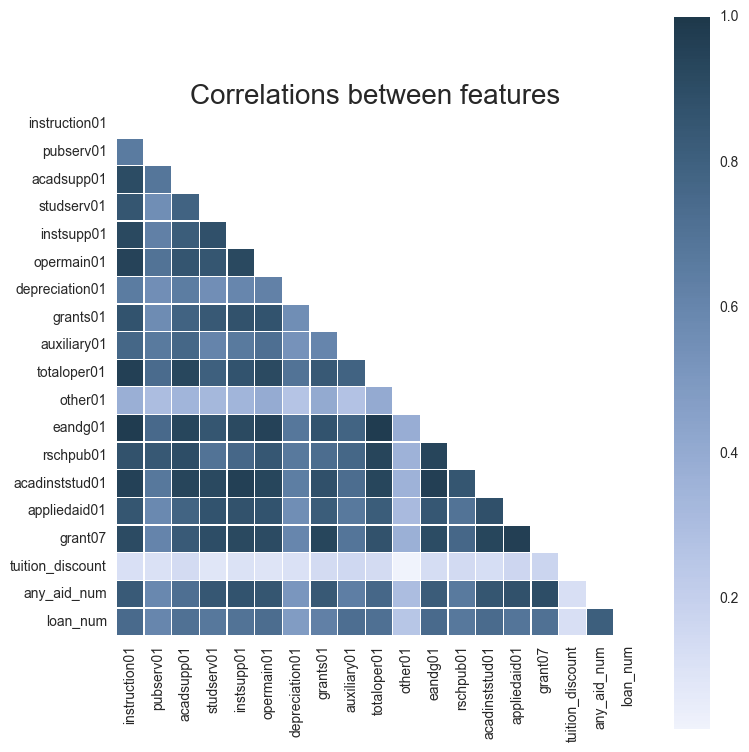

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools.plotting import table

#Visualize the correlation for each feature pair
plt.figure(figsize=(8,8))
corr = x.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap= sns.cubehelix_palette(start=-0.4, rot=0.1, dark=.2, light=.95,as_cmap=True)
sns.set_style("whitegrid")
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, square=True, linewidths=.2,)
plt.title('Correlations between features ', size=20)
plt.tight_layout()
#plt.savefig("01.png", dpi=600);

## Feature Distributions
Scatter matrix is able to demonstrate whether the feature we attempted to predict are relevant to each other or not. It also, revels if the distribution is normal or skewed. Considering figure below, the relatively large standard deviations indicate the distributions are spread out. In addition, it shows the distributions are highly skewed for almost all the features. The feature rescaling and data transformation could help us to change our data distribution.

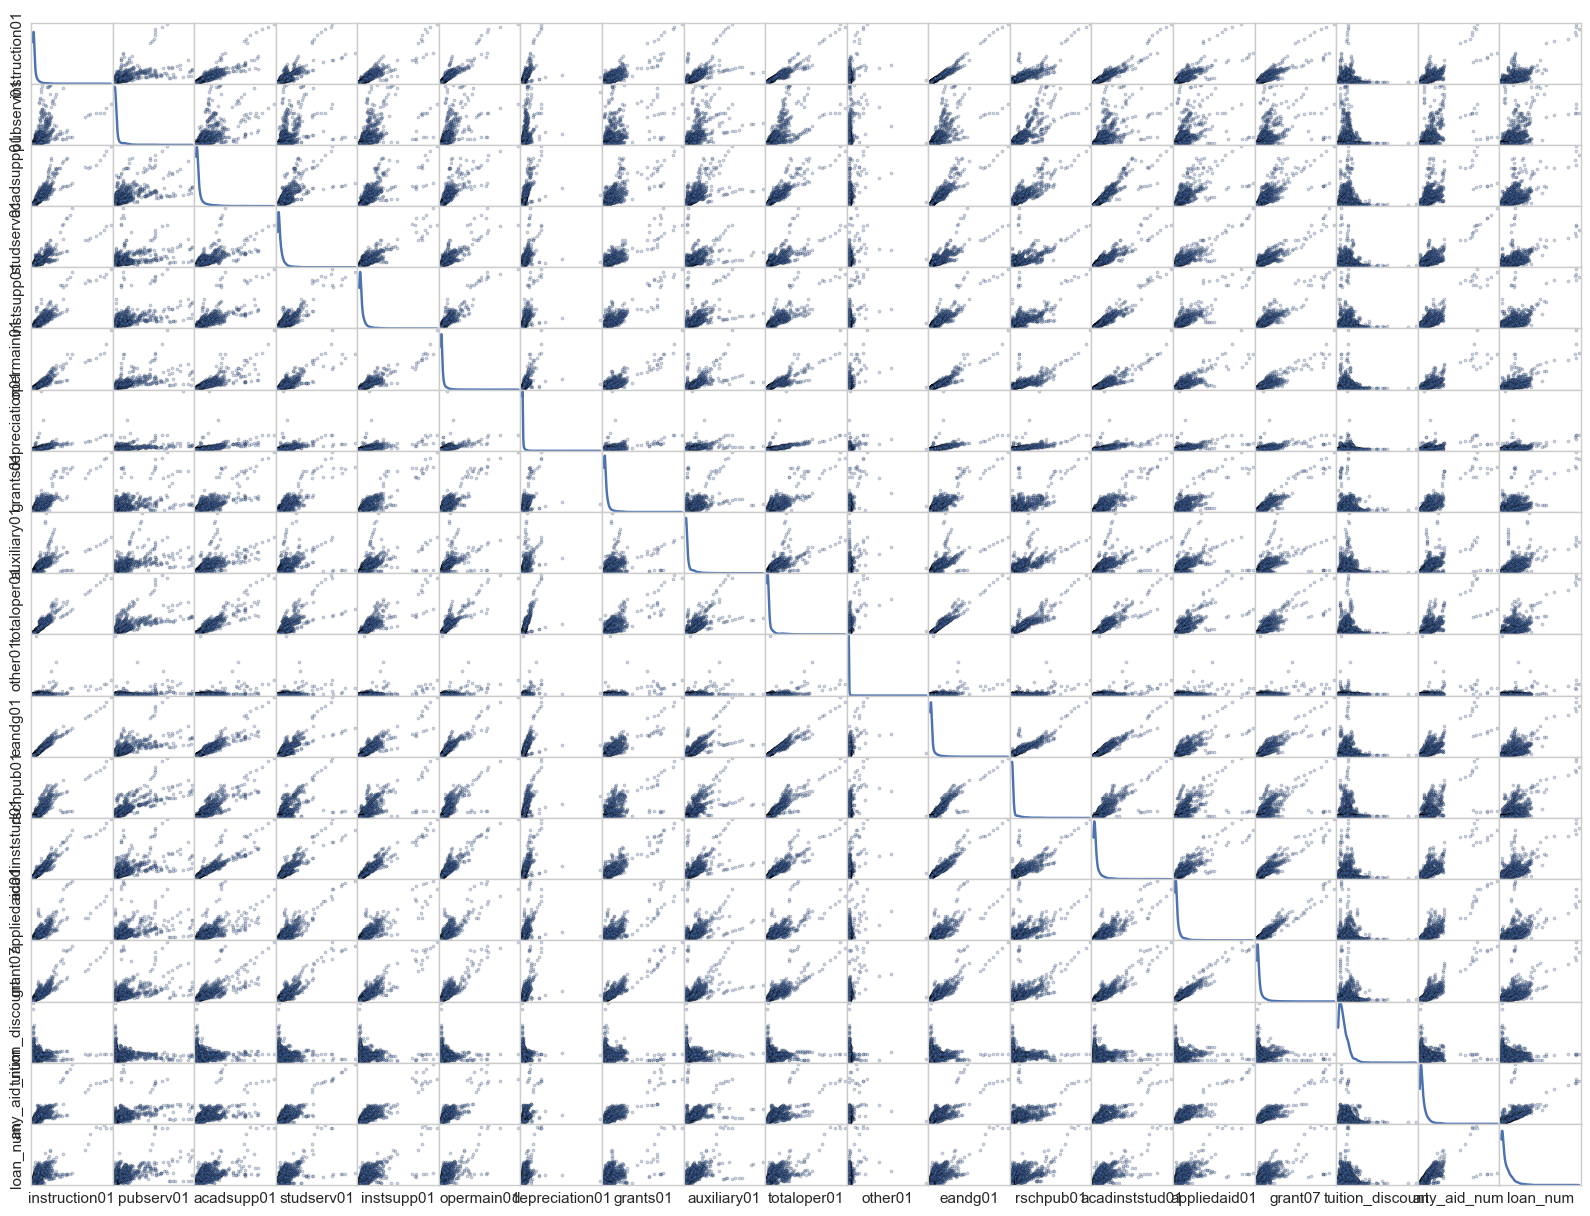

In [11]:
# scatter matrix first half of features 
sm = pd.scatter_matrix(x[x.keys()[:]], alpha = 0.3, figsize = (20,15), diagonal = 'kde');
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        #ax.set_ylabel("")
        #ax.set_xlabel("")
#pic = sm[0][0].get_figure()  
#pic.savefig("02.png", dpi=300)  

## Transforming Skewed Continuous Features
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling, particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm where it will be implemented in this section.

Figure below shows the log-transformed data, the scatter matrix of first five features after applying a natural logarithm scaling to the data. The distribution of each feature appears much more normal. For any pairs of features that have been identified earlier as being correlated, the correlation is still present and it is now stronger and more clear than before.


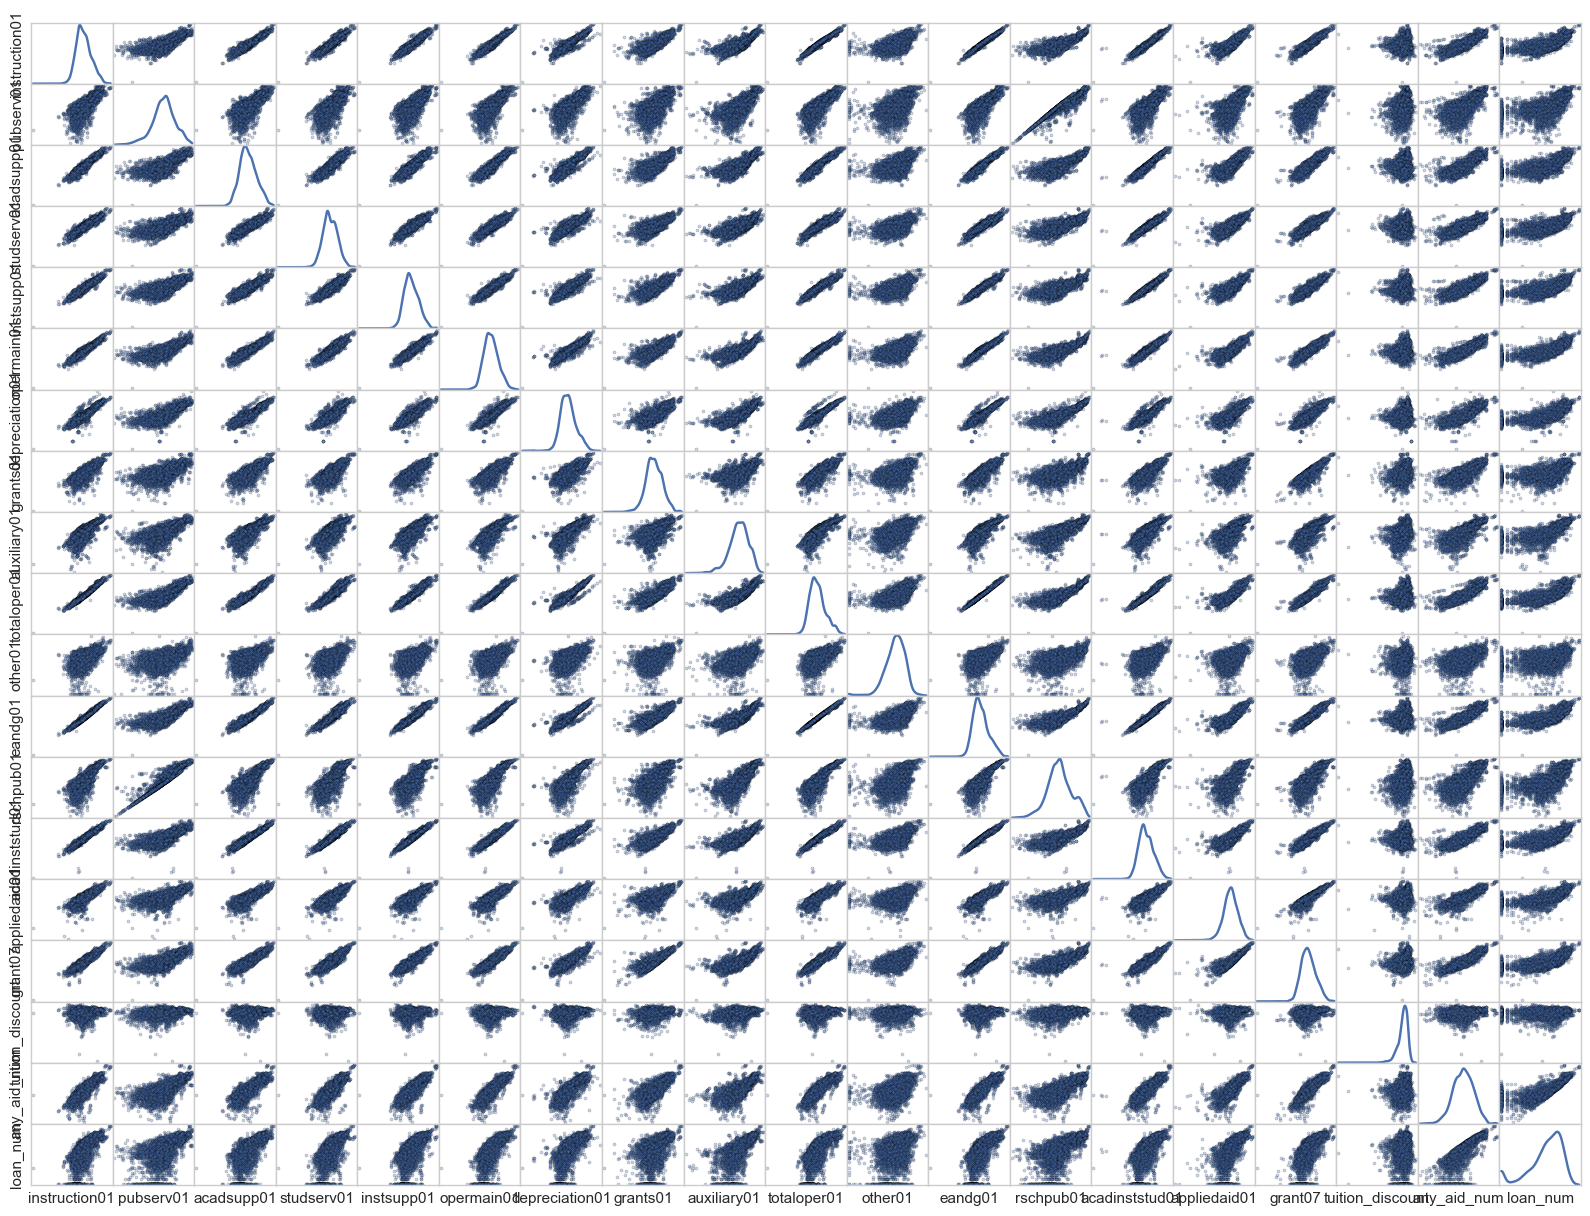

In [12]:
# Replacing zero values with one to avoid infinity logaritmic values
x[x==0] = 1

# Scale the data using the natural logarithm
x_log = np.log(x)
y_log = np.log(y)

# Produce a scatter matrix for each pair of newly-transformed features
sm = pd.scatter_matrix(x_log[x_log.keys()[:]], alpha = 0.3, figsize = (20,15), diagonal = 'kde');
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        #ax.set_ylabel("")
        #ax.set_xlabel("")
#pic = sm[0][0].get_figure()  
#pic.savefig("03.png", dpi=300)  

## Algorithms and Techniques
So far, the datasets have been loaded with *python pandas* library and stored as a data frame. After removing outliers, missing values, unnecessary data points and features, the log transformation of data was implemented. Next, cross-validation function will be used to split the data into training and the testing datasets (75% assigned to training datasets and 25% assigned to testing datasets).

Having the training and testing datasets ready, the Principal Component Analysis (PCA) will be implemented to find the dimensions that explain the most of the variance. The top components become predicting features for creating next models. Before the PCA procedure, the standardizing and feature scaling procedures will be performed on the dataset.

Different algorithms will be used to create predictive models. These models will be able to predict a specific institution completion rate based on its expenditure and financial aid features. The following are few supervised learning models that are currently available in scikit-learn that from which four algorithms will be selected and studied further in this project.

* **K-Nearest Neighbor Regressor:** The model estimates value by the closest data points, and the model costs less with minimal tuning.
* **Decision Tree Regressor:** The model is easy to implement and also performs very fast. Once trained the model predicts very quick. The model gives a clear structure of how it makes a prediction, but the downside is the prediction may lack interpretation.
* **Support Vector Regressor:** The model is also a commonly used model. SVR has solid founding theory, less prone to over-fitting, and need less tuning.
* **Multiple Layer Perceptron Regressor:** The model uses the structure of a neural network and is regaining popularity due to numerous applications on voice and image recognition.
* **Random Forest Regressor:** The model creates multiple decision trees and trains with data through bootstrap sampling. Every node on the branch will randomly choose a small amount of the features. The trees will be tested with data not sampled. This method can avoid over-fitting to training data by its randomness. The setting has ten decision trees as estimators with no maximum depth and considers all the features when looking for the best split. No maximum for the leaf node and the minimum samples leaf is one.

In the next step, the models will be optimized and tuned using Grid Search function and sets of hyperparameters. The metrics mentioned before will be imported from scikit-learn package and will be used to evaluate different models and their testing results. 

The final goal would be finding the most accurate model which is capable of predicting target label (completion rates) with highest performance scores. An important task when performing supervised learning on a dataset like this is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label, one could simplify the understanding of the phenomenon, which is almost always a useful thing to do. Moreover, using the Principal Component Analysis, a list of expenditure and financial aid features will be selected to be used as inputs for the final model in order to speed up the prediction process while maintaining the accuracy in an acceptable range.


## Benchmark model
An un-tuned *AdaBoostRegressor* is used as the Benchmark Model. This model is trained and tested on the original training and testing datasets (datasets before implementing the log-transformation). Next, the selected models will be trained using PCA-transformed datasets and will be tuned and optimized further. The evaluation metrics and performance scores (R<sup>2</sup>) will be used to compare the results of the benchmark model against other models and the optimized ones.

In [13]:
from sklearn import cross_validation
#Divide label and data and randomly choose training and testing set
xi_train, xi_test, yi_train, yi_test=cross_validation.train_test_split(x, y, test_size=0.25, random_state=0)

#Calcuate benchmark with untuned DecisionTreeRegressor()
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor


benchmark = AdaBoostRegressor(random_state = 0)
benchmark = benchmark.fit(xi_train,yi_train);

predictions = benchmark.predict(xi_test)
R2score = performance_metric(yi_test, predictions) 

print "R2 score on the testing data:        {:.4f}".format(performance_metric(yi_test, predictions))
print "Regressor.score on the testing data: {:.4f}".format(benchmark.score(xi_test, yi_test))    

C:\Users\Mo\Anaconda3\envs\DAND\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


R2 score on the testing data:        0.8413
Regressor.score on the testing data: 0.8413


## Data Preprocessing
In addition to data cleaning procedures and performing log-transformation on features that are highly skewed, it is often good practice to perform some type of feature scaling on numerical features.

## Feature Scaling
Applying a scaling to the data does not change the shape of each feature's distribution, however, normalization ensures that each feature is treated equally when applying supervised learners. Moreover, once scaling is applied, observing the data in its raw form will no longer have the same original meaning. sklearn *MinMaxScaler* is used to normalize each numerical feature.

Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted into a "dummy" variables. Since there are no features that are non-numeric, the encoding step will be skipped.


In [14]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

#features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
x_log_transform= pd.DataFrame(scaler.fit_transform(x_log), columns=x_log.keys())
y_log_transform= pd.DataFrame(scaler.fit_transform(y_log),  columns=['totalcompletions'])['totalcompletions']

# Show an example of a record with scaling applied
display(x_log_transform.head(n = 5))

C:\Users\Mo\Anaconda3\envs\DAND\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Mo\Anaconda3\envs\DAND\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


,instruction01,pubserv01,acadsupp01,studserv01,instsupp01,opermain01,depreciation01,grants01,auxiliary01,totaloper01,other01,eandg01,rschpub01,acadinststud01,appliedaid01,grant07,tuition_discount,any_aid_num,loan_num
0,0.634379,0.729095,0.717825,0.703634,0.761865,0.692286,0.694245,0.674156,0.709890,0.693404,0.776324,0.681005,0.735154,0.740439,0.772182,0.723424,0.949754,0.585107,0.655866
1,0.493520,0.453784,0.492533,0.511652,0.528631,0.410320,0.406031,0.467011,0.557960,0.470139,0.632181,0.473513,0.416071,0.516798,0.555739,0.461487,0.833011,0.294523,0.302260
2,0.557142,0.569279,0.415348,0.523749,0.571346,0.541860,0.453939,0.604750,0.606073,0.532150,0.651456,0.536882,0.521967,0.536052,0.625283,0.579745,0.797409,0.446341,0.504203
3,0.567357,0.565065,0.438137,0.563022,0.575891,0.501517,0.471299,0.606893,0.610194,0.538213,0.627045,0.542647,0.518103,0.551578,0.626643,0.582097,0.808472,0.443326,0.512434
4,0.572304,0.561084,0.423046,0.561925,0.574461,0.507631,0.504541,0.625029,0.604611,0.543641,0.633505,0.547628,0.514453,0.549367,0.631413,0.595752,0.804485,0.447820,0.515368


## PCA
In this section, Principal Component Analysis (PCA) is used to draw conclusions about the underlying structure of the Expenditure/Financial datasets. Since using PCA on a dataset calculates the dimensions which best maximize variance, it shows which compound combinations of features best describe the target label.

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, PCA is applied to the dataset to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension, i.e. how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space however, it is a composition of the original features present in the data. Figure below shows the normalized explained variance ratio (weights) both incrementally and cumulatively.


pca.explained_variance_

[  1.90941593e-01   2.29288003e-02   1.42884251e-02   1.10283324e-02
   5.51917568e-03   5.32022997e-03   3.42830803e-03   3.00930778e-03
   1.80557987e-03   1.57604157e-03   1.09522895e-03   8.94072887e-04
   8.12037743e-04   5.77581031e-04   3.84277877e-04   2.77401777e-04
   9.68285269e-05   8.73712861e-05   1.94077152e-05] 


explained_variance_ratio_

[  7.23017123e-01   8.68219173e-02   5.41043774e-02   4.17597500e-02
   2.08988437e-02   2.01455183e-02   1.29815896e-02   1.13950084e-02
   6.83698686e-03   5.96781990e-03   4.14718067e-03   3.38548556e-03
   3.07485228e-03   2.18706133e-03   1.45510195e-03   1.05040621e-03
   3.66649726e-04   3.30839053e-04   7.34890190e-05] 




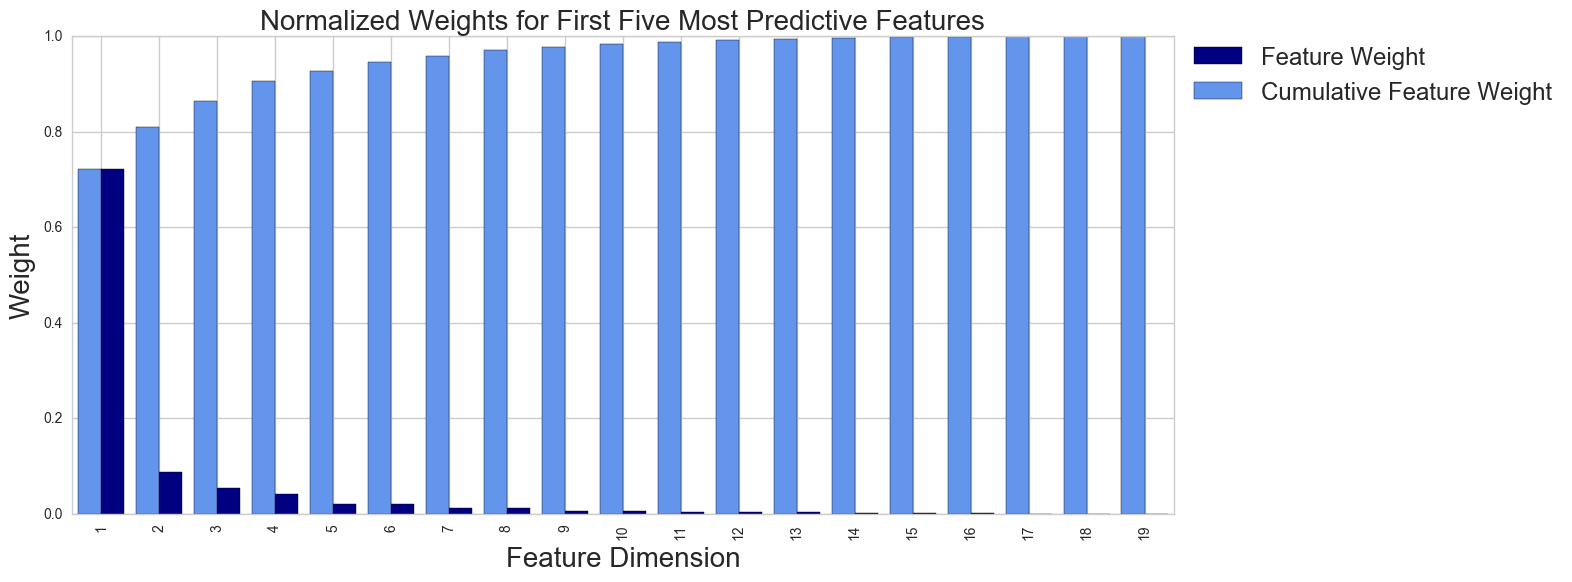

In [16]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x_log_transform, y, test_size=0.25, random_state=0)

pca = PCA()
pca.fit(x_train)
x_pca_train = pca.transform(x_train)
x_pca_train = pd.DataFrame(x_pca_train, index=x_train.index)

x_pca_test = pca.transform(x_test)
x_pca_test = pd.DataFrame(x_pca_test, index=x_test.index)

print 'pca.explained_variance_\n\n', pca.explained_variance_, '\n\n'
print 'explained_variance_ratio_\n\n', pca.explained_variance_ratio_, '\n\n'

importances = pca.explained_variance_ratio_
fig = vs.feature_plot(importances, x_pca_train, y_train)
#fig.savefig("04.png", dpi=300,bbox_inches='tight');

## Dimensionality Reduction
Based on Figure above, 81% of the variance in the data is explained in total by the first and second principal component and 10% by third and fourth principal components. Therefore, we can say 91% of the variance in the data is explained by the first four dimensions. 

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data, in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a significant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterward.

In this study, we chose to reduce the dimensionality to seven principal components since 97% of the variance in the data is explained in total by the first seven components. Figure below shows the results of assigning and fitting PCA in seven dimensions with the final dataset.

Note that a positive increase in a specific dimension corresponds with an increase of the positive-weighted features and a decrease of the negative-weighted features. The rate of increase or decrease is based on the individual feature weights.

Using the visualization below, one can see the first dimension best represent all the expenditure and financial aid categories. The second dimension is totally in a different direction and mostly depends on **loan_num** feature.

The third dimension differentiates between the effect of **pubser01** and **rschpub01** versus the rest of features and the fourth dimension further accentuate the difference between **other01** versus **pubser01** and **rschpub01**.


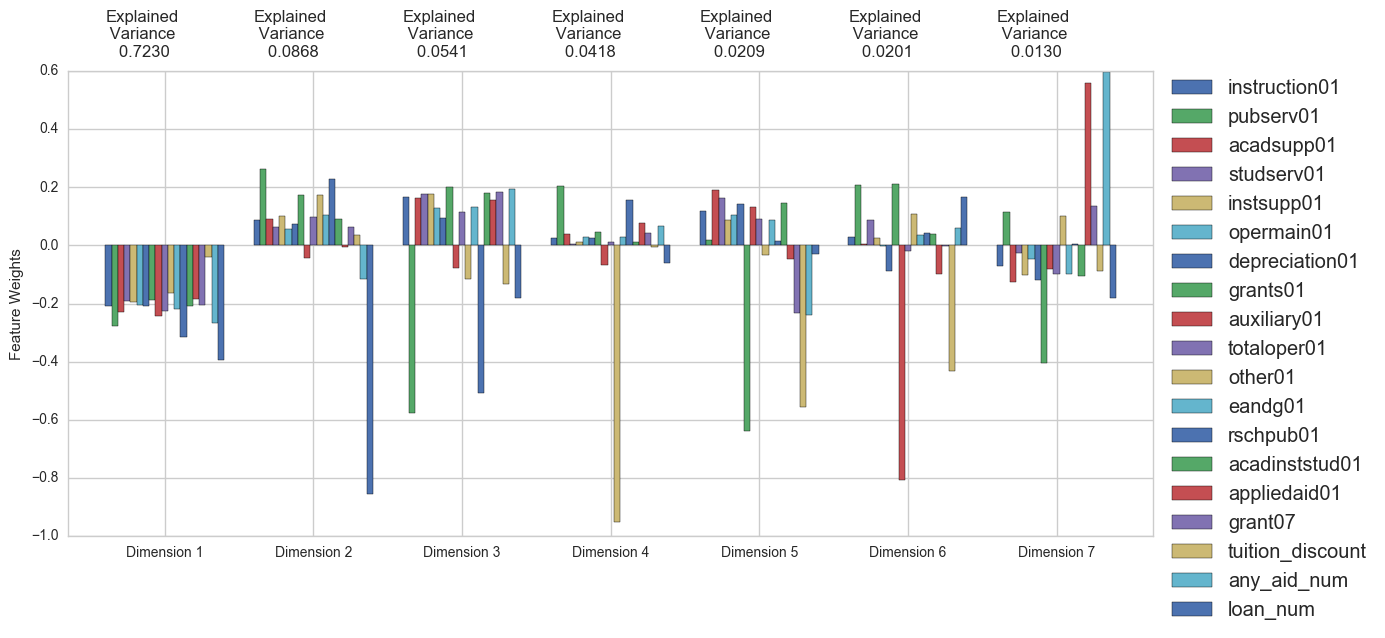

In [18]:
#####################################################################
from sklearn.decomposition import PCA
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 7)
pca.fit(x_train)
x_reduced_train = pca.transform(x_train)
x_reduced_train = pd.DataFrame(x_reduced_train, index=x_train.index)

x_reduced_test = pca.transform(x_test)
x_reduced_test = pd.DataFrame(x_reduced_test, index=x_test.index)

# Generate PCA results plot
results = vs.pca_results(x_train, pca)

## Implementation
From the mentioned list of the supervised learning models, four algorithms that are more appropriate for regression analysis of this project have been selected and will be tested on the IPDES dataset. These algorithms are; *DecisionTreeRegressor, KNeighborsRegressor, AdaBoostRegressor*, and *RandomForestRegressor*. These algorithms can handle lots of irrelevant features and perform well with large datasets. Other models aren't suitable for high-dimensional cases and are prone to overfitting.

## Creating a Training and Predicting Pipeline
To properly evaluate the performance of each selected model, it's important to create a training and predicting pipeline that allows us to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. The implementation here will be used in the following section. 

In the predicting pipeline, at first, the score metrics are imported from *sklearn*. Then the learner will be *fit* to the sampled training data and the training time will be recorded. Next, predictions on the testing dataset and also on the first 300 training data points will be performed and the total prediction time will be recorded. Finally, R<sup>2</sup> score for both the training subset and testing set will be calculated.


In [19]:
def train_predict(learner, sample_size, X_pca_train, X_reduced_train, y_train, X_reduced_test, X_pca_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner_pca = learner.fit(X_pca_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time

    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_pca_test = learner_pca.predict(X_pca_test)
    predictions_pca_train = learner_pca.predict(X_pca_train[:300])
    end = time() # Get end time
    
    learner_reduced = learner.fit(X_reduced_train[:sample_size], y_train[:sample_size])
    predictions_reduced_test = learner_reduced.predict(X_reduced_test)
    predictions_reduced_train = learner_reduced.predict(X_reduced_train[:300])
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
    
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['R2_pca_train'] = performance_metric(y_train[:300], predictions_pca_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['R2_pca_test'] = performance_metric(y_test, predictions_pca_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    beta = 0.5
    results['R2_reduced_train'] = performance_metric(y_train[:300], predictions_reduced_train)    
    # Compute F-score on the test set which is y_test
    results['R2_reduced_test'] = performance_metric(y_test, predictions_reduced_test)   
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

## Initial Model Evaluation
Four supervised learning models discussed in the previous section are imported from *sklearn* and initialized and stored in *Reg_A, Reg_B, Reg_C*, and *Reg_D*. A random_state and the default settings for each model is used. (tuning and optimization will be done on specific models in next sections).  Samples of training data (equal to 1%, 10%, and 100% of the training data) are used for training each model. Finally, the models are tested using the testing dataset and the results are collected in the figure below.

DecisionTreeRegressor trained on 34 samples.
DecisionTreeRegressor trained on 345 samples.
DecisionTreeRegressor trained on 3456 samples.
KNeighborsRegressor trained on 34 samples.
KNeighborsRegressor trained on 345 samples.
KNeighborsRegressor trained on 3456 samples.
AdaBoostRegressor trained on 34 samples.
AdaBoostRegressor trained on 345 samples.
AdaBoostRegressor trained on 3456 samples.
RandomForestRegressor trained on 34 samples.
RandomForestRegressor trained on 345 samples.
RandomForestRegressor trained on 3456 samples.


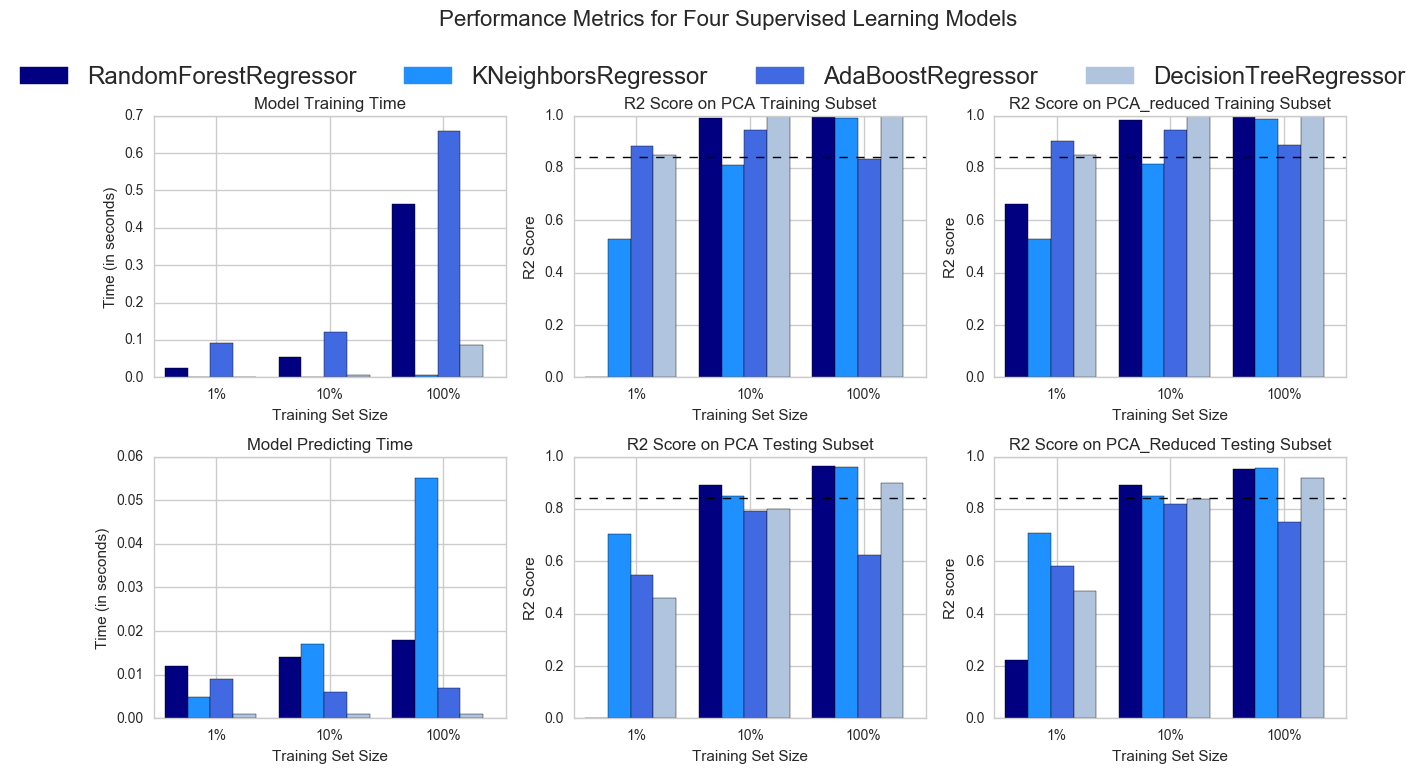

In [21]:
# Import the three supervised learning models from sklearn

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from time import time


# Initialize the four models
clf_A = DecisionTreeRegressor()
#clf_C = MLPRegressor()
clf_B = KNeighborsRegressor()
#clf_C = GradientBoostingRegressor()
#clf_C = SVR()
clf_C = AdaBoostRegressor()
clf_D = RandomForestRegressor()

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = int(x_reduced_train.shape[0]*1)
samples_10 = int(x_reduced_train.shape[0]*0.1)
samples_1 = int(x_reduced_train.shape[0]*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, x_pca_train, x_reduced_train, y_train, x_reduced_test, x_pca_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
fig = vs.evaluate(results, R2score, R2score)
#fig.savefig("06.png", dpi=600,bbox_inches='tight');

In [22]:
print 'R2 score on PCA_reduced testing subset with 100% sample:\n'
for k in results.keys():
    print k,':  ', results[k][2]['R2_reduced_test']

R2 score on PCA_reduced testing subset with 100% sample:

RandomForestRegressor :   0.952084643366
KNeighborsRegressor :   0.956149460912
AdaBoostRegressor :   0.751555016962
DecisionTreeRegressor :   0.917482827177


## Choosing the Best Model

Based on our evaluation, *RandomForestRegressor* model seems to be the most appropriate one for the task of predicting institutes completion rates using Expenditure/Financial data features. *KNeighborsRegressor* model has the highest R2 score on both PCA and reduced PCA testing sets when 100% of the training set is used (0.96 and 0.95 respectively). *RandomForestRegressor* has almost the same R<sup>2</sup> score results (0.95 and 0.94 respectively) but it has a significantly shorter testing time. On the other hand, *KNeighborsRegressor* has shorter training time which makes it very competitive with *RandomForestRegressor* and the second choice in terms of efficiency. Moreover, *DecisionTreeRegressor* has lowest performance results although it has the fastest training and testing time.

## Refinement
## Model Tuning using Grid Search and Cross-Validation
In this section, the chosen models (*RandomForestRegressor* and *KNeighborsRegressor*) are optimized and fine-tuned. *k-fold* cross validation split the training set into k bins, use a bean as testing data and use rest of the data as training data and validate against testing data. It repeats the process k times. The performance measure reported by *k-fold* cross validation is then the average of the values computed in the loop. *k-fold* cross validation especially useful for small dataset since it maximizes both test and training data.

This technique is very useful for grid search when optimizing a model. The grid search, systematically working through multiple combinations of Hyper-parameters, tunes and determine which one gives the best performance.

In this project, grid search function (*GridSearchCV*) is used with a couple of important parameters (hyperparameters) tuned with at least 3 different values. A dictionary of parameters is created to tune for the chosen model and the entire training set are being used for this process.


In [23]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer 
from sklearn.grid_search import GridSearchCV

def fit_model(X, y, model, params):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    #cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a regressor object
    regressor = model

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = params

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    #scoring_fnc = adj_r2_score(model,X,y)
    scoring_fnc = make_scorer(performance_metric)
    
    # Create the grid search cv object --> GridSearchCV()
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, param_grid = params, scoring = scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid_fit = grid.fit(X, y)
    best_clf = grid_fit.best_estimator_
    
    # Make predictions using the unoptimized and optimized models
    predictions = (clf.fit(x_reduced_train, y_train)).predict(x_reduced_test)
    best_predictions = best_clf.predict(x_reduced_test)
    print "unoptimized model score on the testing data: {:.4f}".format(performance_metric(y_test, predictions))
    print "optimized model score on the testing data:   {:.4f}".format(performance_metric(y_test, best_predictions))
    # metric_score_cv(X, y, best_clf,10)
    return grid_fit.best_estimator_

C:\Users\Mo\Anaconda3\envs\DAND\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Model Evaluation and Validation
The table below shows the optimized model's R<sup>2</sup> score on the PCA reduced testing data along with the results from our unoptimized model and the benchmarks model discussed earlier.

In [24]:
model = KNeighborsRegressor()
params={'n_neighbors':[1,3,5,10,20,50,70,100], 
        'weights':['uniform','distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size':[1,5,10,30,50]
       }
model_opt = fit_model(x_reduced_train, y_train, model, params)
display (model_opt)

unoptimized model score on the testing data: 0.9503
optimized model score on the testing data:   0.9636


KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='distance')

In [25]:
model = RandomForestRegressor()

params = {'n_estimators':[10,50,100,200,500],
          'max_features':['auto', 'sqrt', 'log2'],
          'max_depth':[10, 20, 30, 50],
          'min_samples_split':[2, 4, 8],
          'bootstrap':[True, False]
         }
model_opt = fit_model(x_reduced_train, y_train, model, params)
display (model_opt)

unoptimized model score on the testing data: 0.9547
optimized model score on the testing data:   0.9554


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


|                       | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :-------------------: | :-----------------: | :---------------: | :-------------: | 
| RandomForestRegressor |       0.8413        |      0.9494       |     0.9552      |
| KNeighborsRegressor   |       0.8413        |      0.9561       |     0.9636      |

The above table shows optimized model's score on the testing data are 0.9552 and 0.9636 respectively which are slightly better than the unoptimized model. The hyperparameters tuning using grid search (GridSearchCV) were effective for our models. Our optimized models performed significantly better than the benchmark model. The R<sup>2</sup> score changed from 0.8413 to 0.9552 and 0.9636.

## Conclusion

The first objective of this project was to find out whether the completion rates could be predicted based on financial aid and expenditure data from post-secondary education institutions and which predictive model can handle this task with the highest performance score.

Implementing PCA procedure, the 19 features that we selected and processed from original IPEDS dataset, were reduced to 7 dimensions. Using this transformed data, different models were tested on the testing dataset and *RandomForestRegressor* showed the best performance among all candidates in terms of testing time and R<sup>2</sup> score. As a result, this model is selected as the best model in terms of predicting target labels (institutes completion rates).

The following section includes the detail of optimized and tuned hyperparameters for the first choice model, *RandomForestRegressor* and second choice model, *KNeighborsRegressor*.

* **KNeighborsRegressor**(algorithm='auto', leaf_size=1, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=3, p=2, weights='distance')

* **RandomForestRegressor**(bootstrap=False, criterion='mse', max_depth=50, max_features='log2', max_leaf_nodes=None, min_impurity_split=1e-07, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1, oob_score=False, random_state=None, verbose=0, warm_start=False)

As the second objective of this project, an important task when performing supervised learning on a dataset like the education dataset under study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is almost always a useful thing to do. In the case of this project, that means we wish to identify a few number of features that most strongly predict institutes completion rates.

Using PCA analysis performed before and based on Reduced PCA figure, 97% of the variance in the data is explained in total by the first seven principal component. The significant positive increase in a specific dimension corresponds with an increase of the positive-weighted features and a decrease of the negative-weighted features. The rate of increase or decrease is based on the individual feature weights. Using the visualization, one can see the first dimension best represent all the expenditure and financial aid categories. The second dimension is totally in a different direction and mostly depends on **loan_num** feature. The third dimension differentiates between the effect of **pubser01** and **rschpub01** versus the rest of features and the fourth dimension further accentuate the difference between **other01** versus **pubser01** and **rschpub01**. These features are most strongly predicting the institutes completion rates. **pubser01** is the expense category that provides noninstructional services beneficial to individuals and groups external to the institution such as conferences. **loan_num** is the number of full-time, first-time degree/certificate-seeking undergraduate students who received student loans. Other features can be looked up in the Feature section table.


## Reflection
This project focused on studying and analyzing different components of the expenditure and financial aid of higher education institutes and utilized them to predict the total number of awards, certificates, and degrees completed each year in these institutions. The project successfully used different tools such as PCA to find the effective combination of features and tested and optimized different algorithms to come up with a model capable of performing better than the benchmark model and other candidates.

Data cleaning and selecting proper features for analysis were the most time-consuming part of this project. For example, some institution runs private labs and hospitals while others have collaboration with industrial or tech companies and finding a common ground to make feature selection was complicated. Many fields excluded for being not relevant to this study and lots of data points with missing values were deleted eventually. Finding suitable algorithms for regression analysis was also struggling. While some well-known ensemble methods (such as Random Forest) seems to be a good fit but their characteristics and specific behavior of these models might not be the best option when dealing with IPEDS dataset. 


## Improvement
The project has lots of room for improvement. Rather than predicting the rankings of institutes using financial and expenditure data, one can include or exclusively use other features such as revenue, number of faculties and employees, geographic region, census division, Carnegie classification, and years to graduation. Moreover, other categories of expenditure and financial aid that has not been included in this study can be considered. 

In addition, different data cleaning approaches or data transformation methods could be examined further. PCA reduces problem dimensionality into a specific number of principal components. With further investigation, one might be able to run multiple scenarios with different combinations of components and see its effect on model performances. Using other algorithms such as *Gradient Boosting Regressor* or *Support Vector Regressor* for regression analysis along with more effective grid search procedure could be studied further as well.


## References
1.	Integrated Postsecondary Education Data System Delta Cost Project Database, https://nces.ed.gov/ipeds/deltacostproject/
2.	Rankings of universities in the United States, https://en.wikipedia.org/wiki/Rankings_of_universities_in_the_United_States
3.	2009–2010 College Rankings: National Universities, http://www.parchment.com/
4.	Statistics and Probability Dictionary, http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination
5.	"Applied to Stanford or Harvard? You probably didn’t get in. Admit rates drop, again.". Retrieved 13 May 2016. https://www.washingtonpost.com/news/grade-point/wp/2016/04/01/
6.	Drucker, H. (1997, July). Improving regressors using boosting techniques. In ICML (Vol. 97, pp. 107-115).
7.	Guyon, I., & Elisseeff, A. (2003). An introduction to variable and feature selection. Journal of machine learning, research, 3(Mar), 1157-1182.
8.	National Conference of State Legislatures (2015, July 31). Performance-based Funding for Higher Education Retrieved from http://www.ncsl.org/research/education/performance-funding.aspx
